# **Finding Outliers**

In [1]:
# importing basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# defining our dataset
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]

(array([8., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

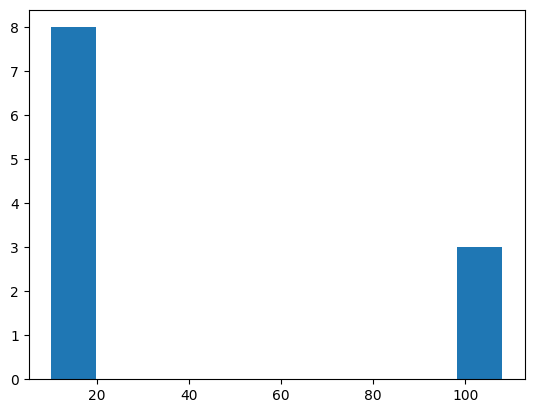

In [3]:
plt.hist(dataset)

## **Using Z Score**

In [4]:
# z-score
def detect_outliers(data):
  outliers = []
  threshold = 3 # 3rd standard deviation
  mean = np.mean(data)
  sd = np.std(data)
  for i in data:
    z_score = (i-mean)/sd
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [10]:
detect_outliers(dataset)

[102, 107, 108]

## **Using Inter Quartile Range**

In [13]:
# sorting
sorted_data = sorted(dataset)
print(sorted_data)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [14]:
# calculating quartiles
first_quartile, third_quartile = np.percentile(dataset, [25, 75])
print(first_quartile)
print(third_quartile)

12.0
15.0


In [15]:
# caculating IQR
IQR = third_quartile - first_quartile
IQR

3.0

In [16]:
# calculating Fences
lower_fence = first_quartile - (1.5 * IQR)
higher_fence = third_quartile + (1.5 * IQR)
print(lower_fence)
print(higher_fence)

7.5
19.5


In [17]:
# now creating a function to detect outliers
def detect_outliers(data):
  # sort the data
  sorted_data = sorted(data)

  # calculating percentiles
  q1, q3 = np.percentile(data, [25, 75])

  # calculating inter quartile range
  iqr = q3 - q1

  # calculating fences
  lower_fence = q1 - (1.5 * iqr)
  higher_fence = q3 + (1.5 * iqr)

  # detecting outliers
  outliers = []
  for i in data:
    if i < lower_fence or i > higher_fence:
      outliers.append(i)
  return outliers

In [18]:
detect_outliers(dataset)

[102, 107, 108]

## **Using Box Plot**

In [19]:
# importing seaborn
import seaborn as sns

<Axes: >

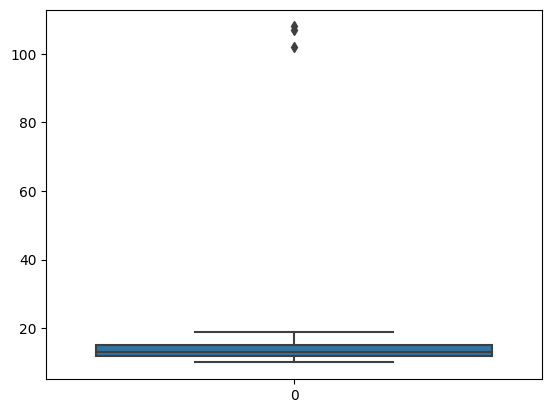

In [20]:
sns.boxplot(dataset)